In [1]:
!pip install ultralytics

In [2]:
from ultralytics import YOLO
import os
from IPython.display import display, Image
from IPython import display
display.clear_output()

## Downloading the Annotated Data from Roboflow

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="<API-KEY>")
project = rf.workspace("sign-language-hhyyo").project("signlanguage-6k5ju")
version = project.version(1)
dataset = version.download("yolov8")

## Loading a Pretrained Model

In [5]:
# model = YOLO('yolov8n.pt')

## Training the model on the yaml data

In [7]:
# results = model.train(data='data.yaml', epochs=20, imgsz=640)
!yolo task=detect mode=train model=yolov8m.pt data={dataset.location}/data.yaml epochs=20 imgsz=640

100% 49.7M/49.7M [00:00<00:00, 349MB/s]
Ultralytics YOLOv8.1.27 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/SignLanguage-1/data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train7, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_cro

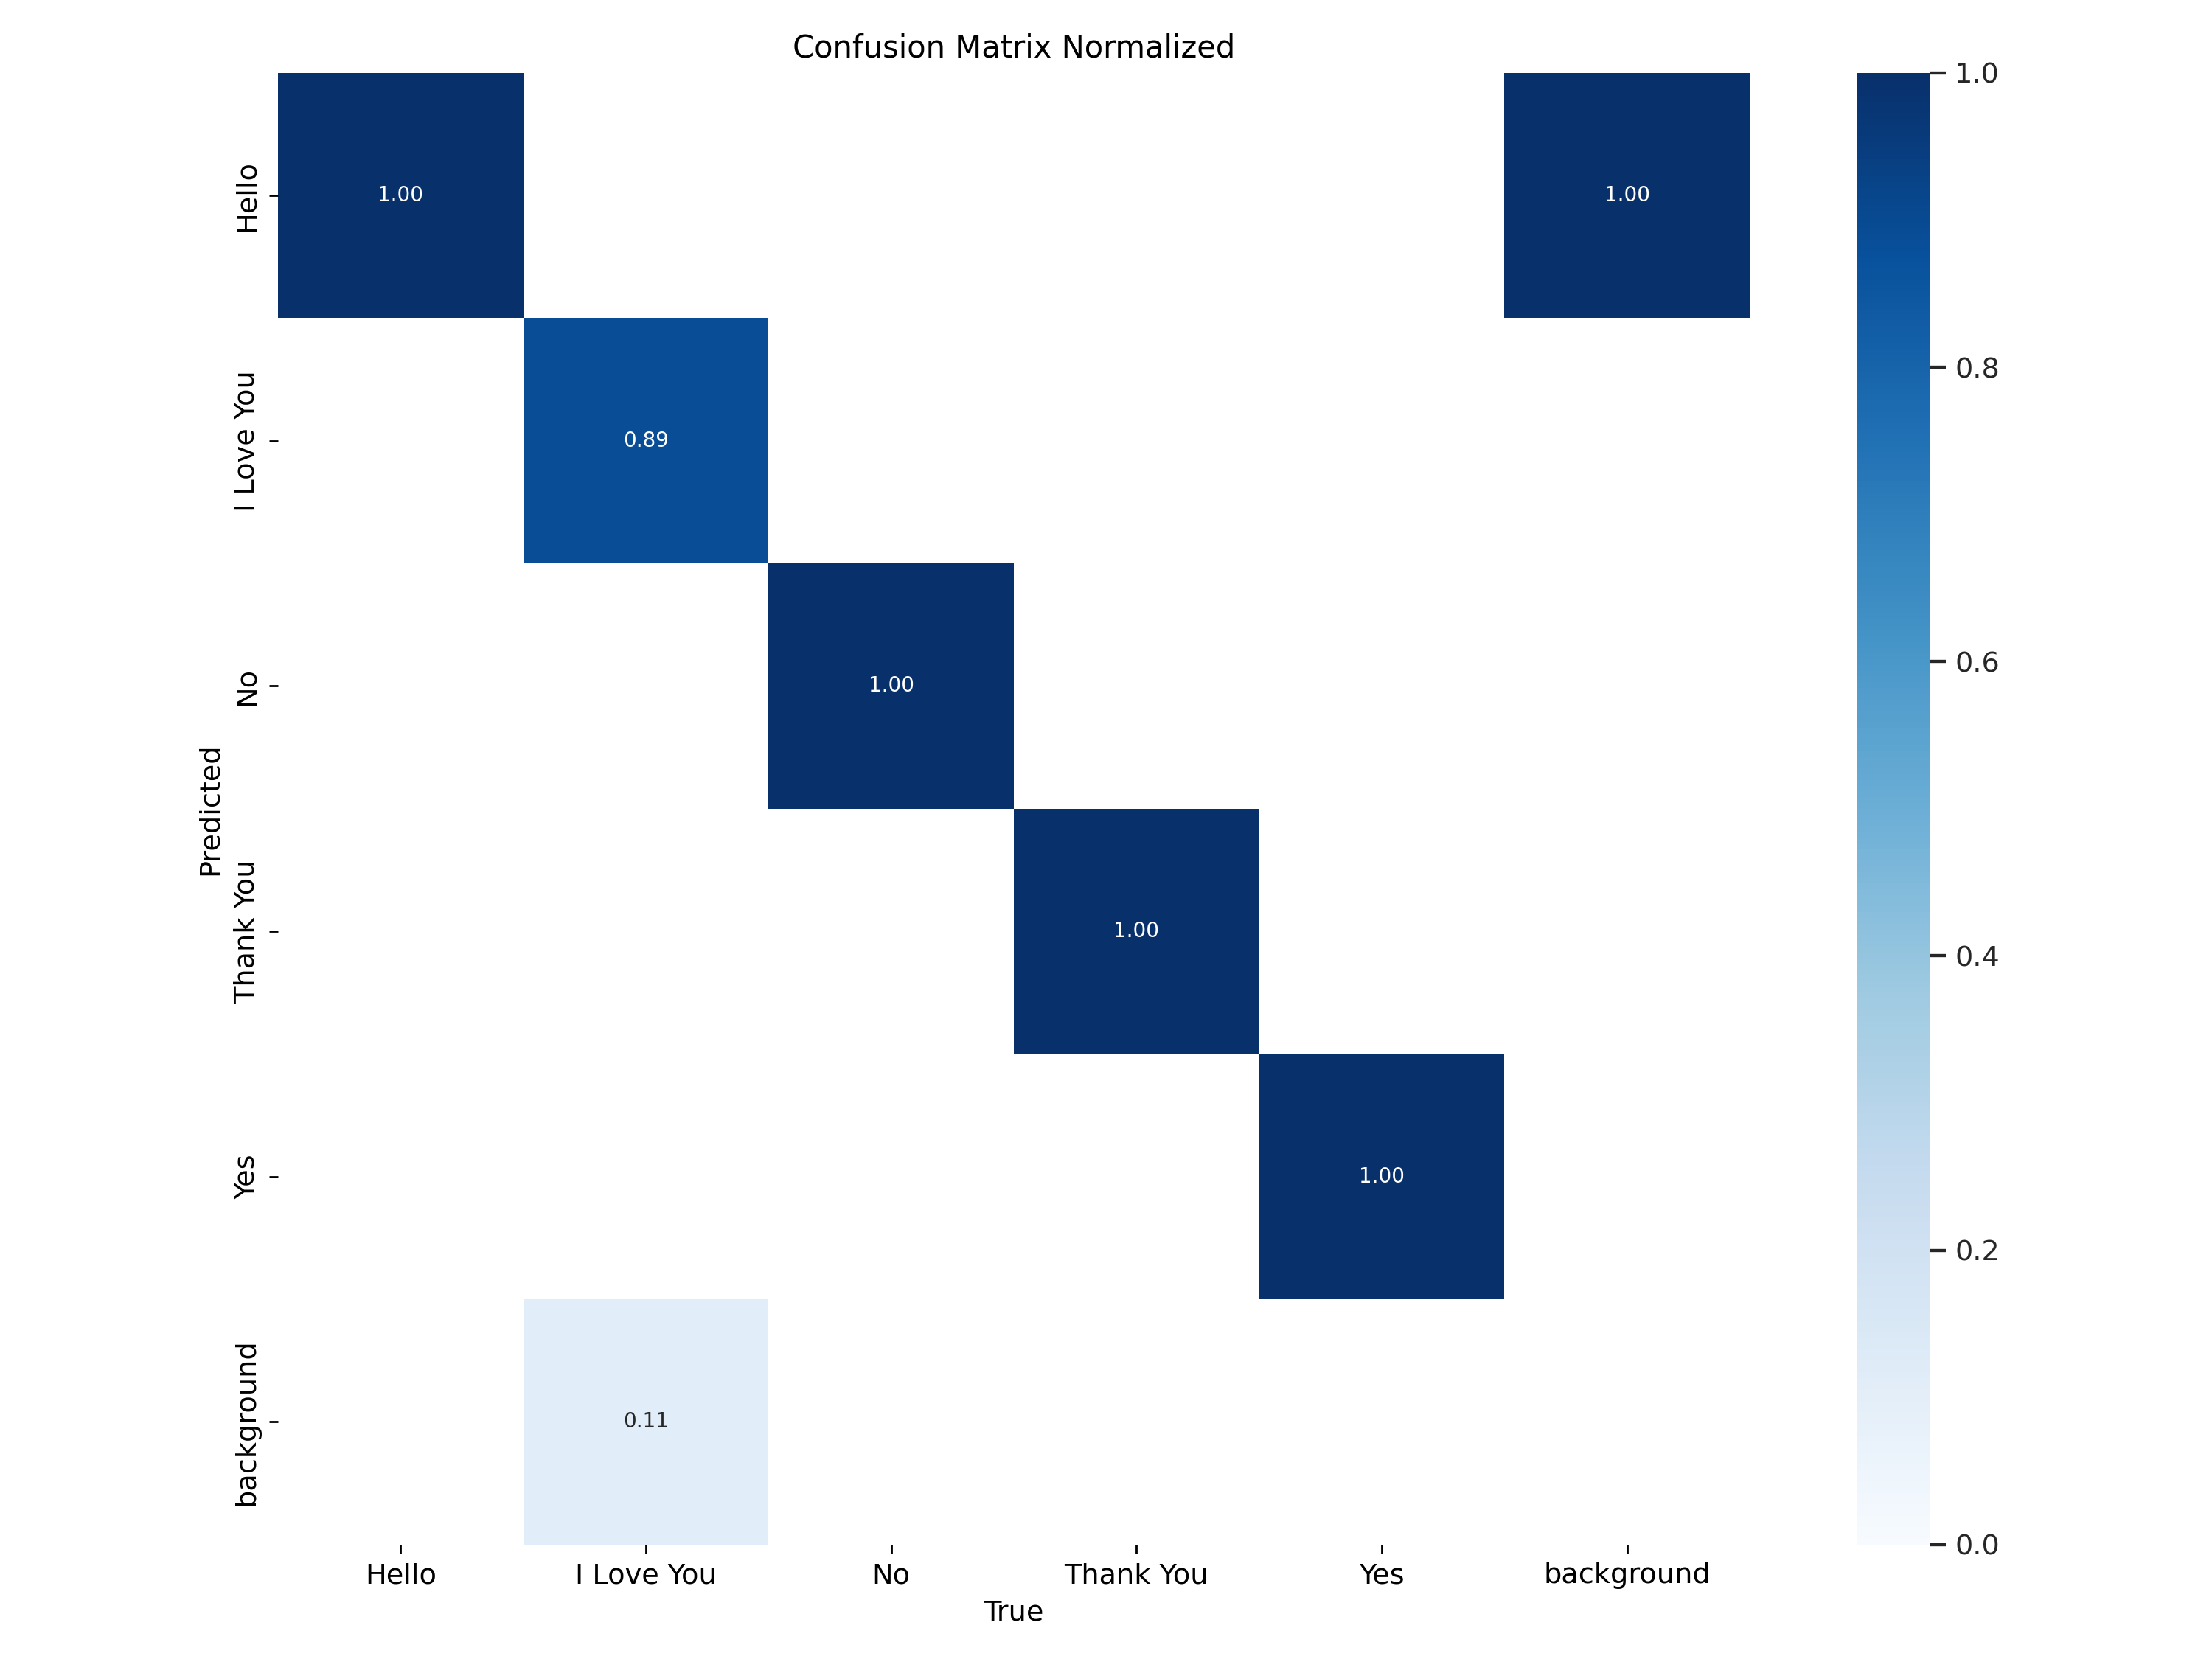

In [11]:
Image(filename=f'/content/runs/detect/train7/confusion_matrix_normalized.png',
      width=800)

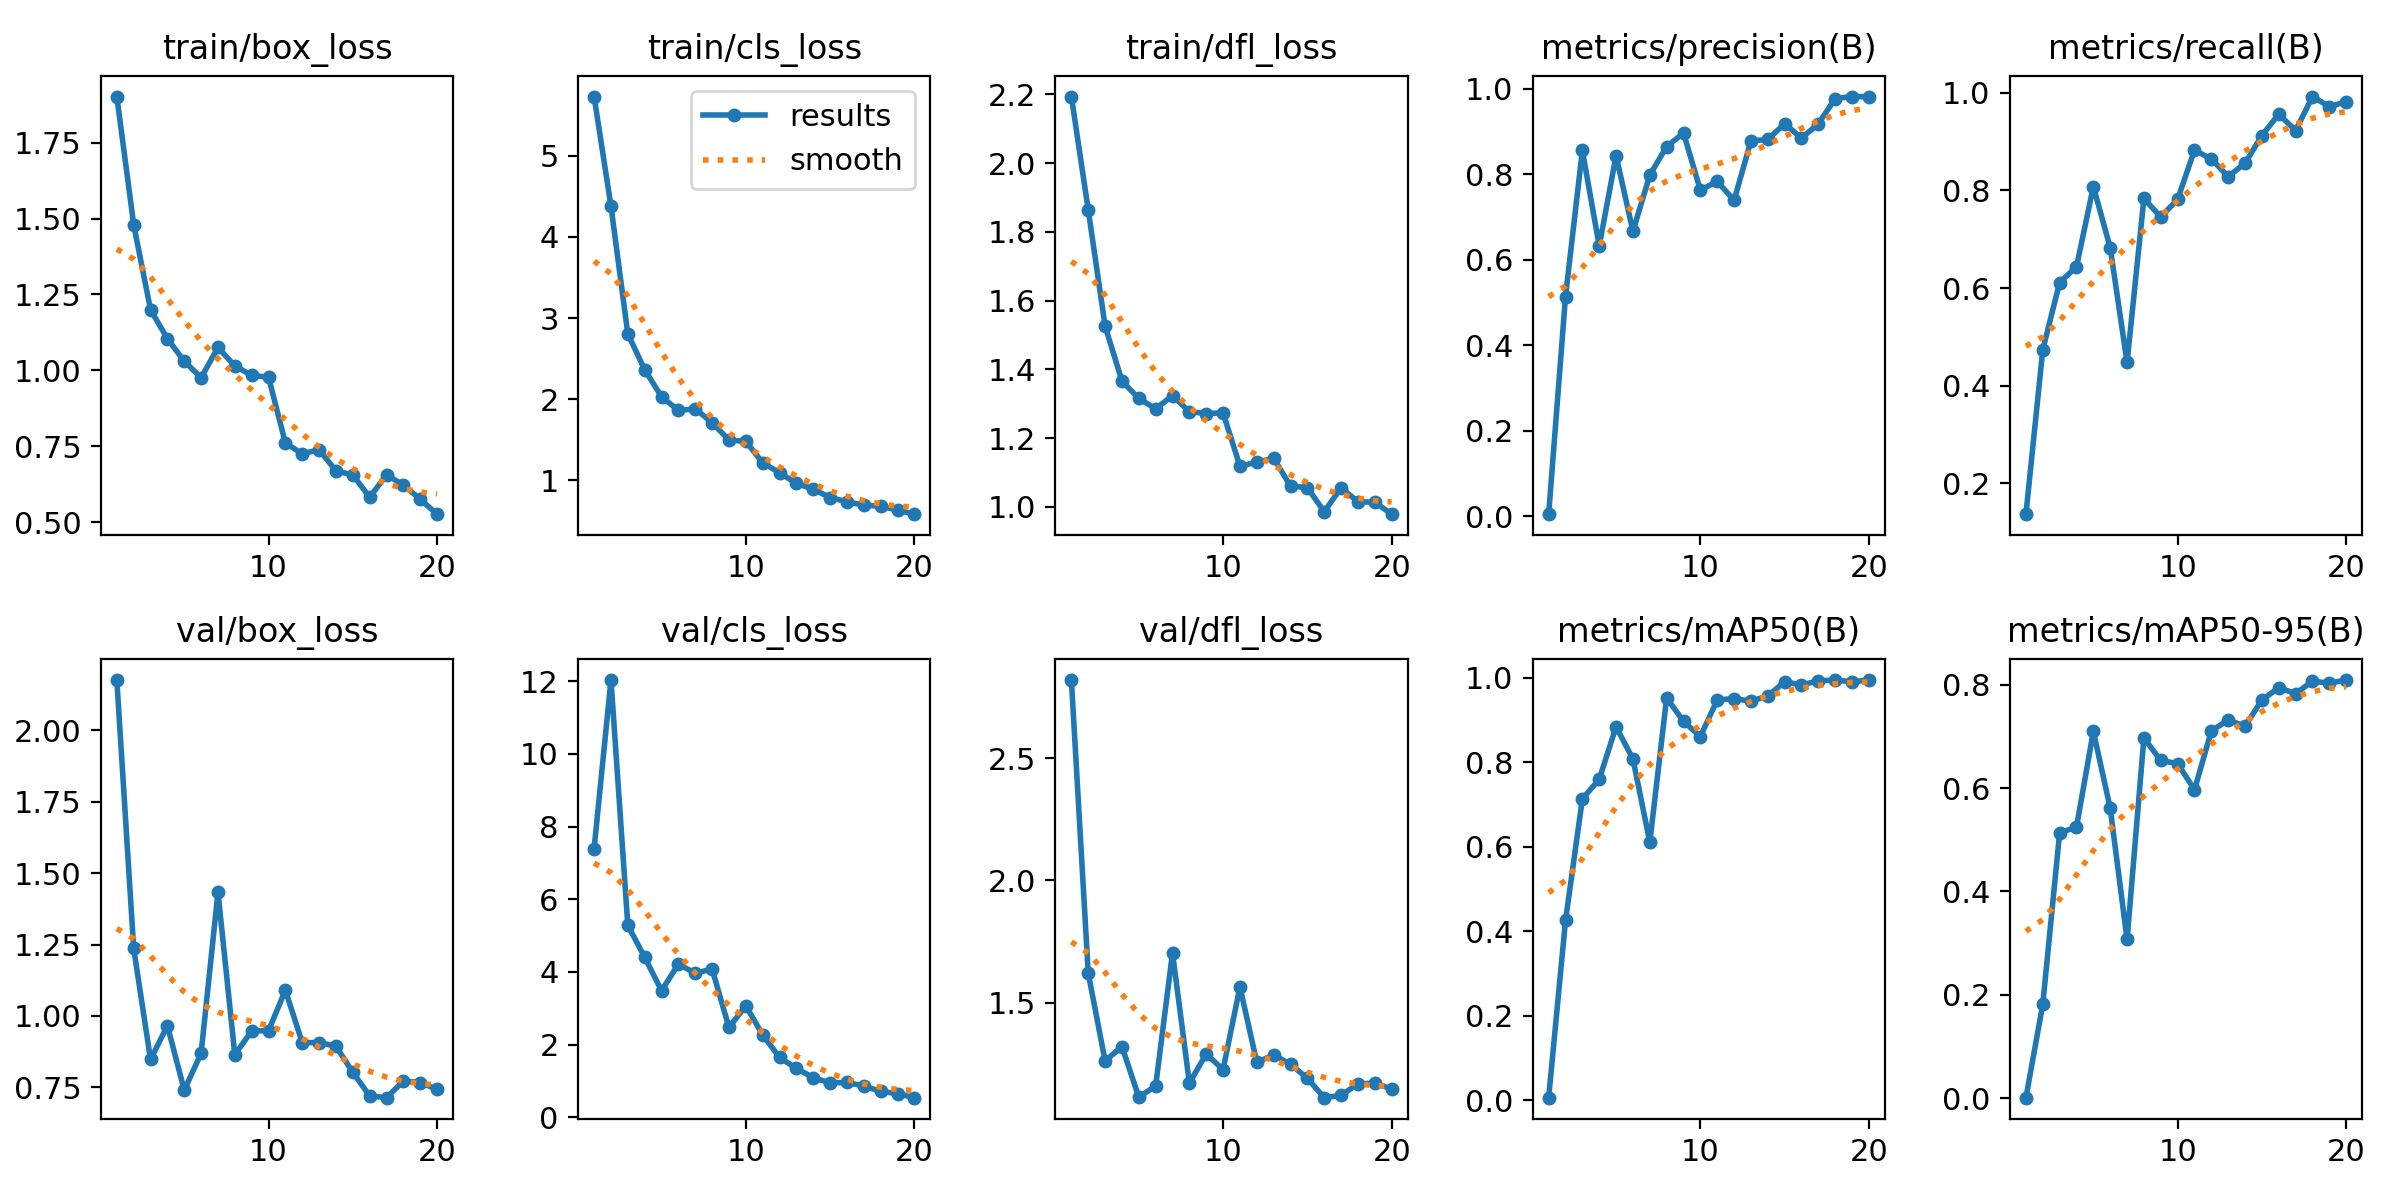

In [12]:
Image(filename=f'/content/runs/detect/train7/results.png',
      width=800)

## Validating the Data

In [14]:
!yolo task=detect mode=val model=/content/runs/detect/train7/weights/best.pt data={dataset.location}/data.yaml

Ultralytics YOLOv8.1.27 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25842655 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/SignLanguage-1/valid/labels.cache... 40 images, 0 backgrounds, 0 corrupt: 100% 40/40 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 3/3 [00:03<00:00,  1.18s/it]
                   all         40         40      0.982      0.981      0.995      0.806
                 Hello         40         10      0.961          1      0.995      0.777
            I Love You         40          9          1      0.908      0.995      0.887
                    No         40          7      0.986          1      0.995      0.858
             Thank You         40          8          1      0.999      0.995      0.664
                   Yes         40          6      0.962          1      0.995      0.842
Speed: 3.0ms preprocess, 30.3ms inference, 0.0ms 